"task 2"


In [2]:
# Create a dictionary to store student information
student_info = {
    "name": "Ali",
    "age": 16,
    "roll_number": "A101",
    "grade": "10th"
}

# 1. Print all keys and values
print("Initial student information:")
for key, value in student_info.items():
    print(f"{key}: {value}")

# 2. Update the grade of the student
student_info["grade"] = "11th"
print("\nUpdated grade:")
print(f"Grade: {student_info['grade']}")

# 3. Add a new key email with a value
student_info["email"] = "ali.a101@example.com"
print("\nAdded email:")
print(f"Email: {student_info['email']}")

# 4. Delete the roll_number key
del student_info["roll_number"]
print("\nDeleted roll_number:")
print("Current student information:", student_info)

Initial student information:
name: Ali
age: 16
roll_number: A101
grade: 10th

Updated grade:
Grade: 11th

Added email:
Email: ali.a101@example.com

Deleted roll_number:
Current student information: {'name': 'Ali', 'age': 16, 'grade': '11th', 'email': 'ali.a101@example.com'}


"task 3"

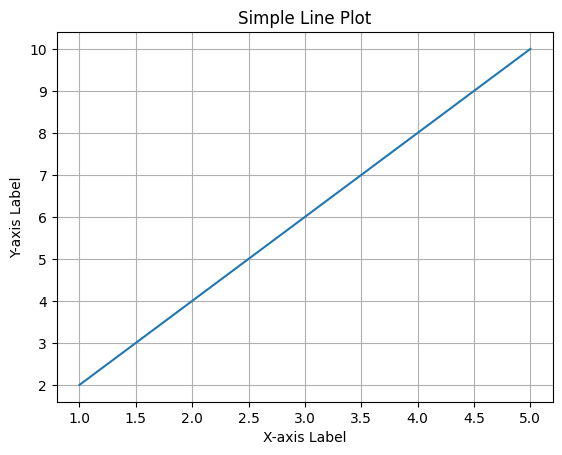

In [3]:
import matplotlib.pyplot as plt

# Data for the plot
X = [1, 2, 3, 4, 5]
Y = [2, 4, 6, 8, 10]

# Create the line plot
plt.plot(X, Y)

# Add title and labels
plt.title("Simple Line Plot")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Add grid lines
plt.grid(True)

# Display the plot
plt.show()

"task 4"

# Task
Implement and compare the performance of Breadth-First Search (BFS) and Depth-First Search (DFS) algorithms for solving the Water Jug problem, focusing on the number of steps, time taken, and memory usage.

## Define the water jug problem

### Subtask:
Create a clear representation of the problem including the states and possible actions (filling, emptying, pouring).


**Reasoning**:
Define a class to represent the state of the water jugs and implement the possible actions as methods within this class. Also, define the initial and goal states.



In [4]:
class WaterJugState:
    """Represents the state of the water jugs."""

    def __init__(self, jug1, jug2):
        """Initializes the state with the current water levels in each jug."""
        self.jug1 = jug1
        self.jug2 = jug2

    def __eq__(self, other):
        """Compares two states for equality."""
        return self.jug1 == other.jug1 and self.jug2 == other.jug2

    def __hash__(self):
        """Generates a hash for the state."""
        return hash((self.jug1, self.jug2))

    def __str__(self):
        """Returns a string representation of the state."""
        return f"({self.jug1}, {self.jug2})"

    def fill_jug1(self, capacity1):
        """Fills jug 1 to its capacity."""
        return WaterJugState(capacity1, self.jug2)

    def fill_jug2(self, capacity2):
        """Fills jug 2 to its capacity."""
        return WaterJugState(self.jug1, capacity2)

    def empty_jug1(self):
        """Empties jug 1."""
        return WaterJugState(0, self.jug2)

    def empty_jug2(self):
        """Empties jug 2."""
        return WaterJugState(self.jug1, 0)

    def pour_jug1_to_jug2(self, capacity2):
        """Pours water from jug 1 to jug 2."""
        pour_amount = min(self.jug1, capacity2 - self.jug2)
        return WaterJugState(self.jug1 - pour_amount, self.jug2 + pour_amount)

    def pour_jug2_to_jug1(self, capacity1):
        """Pours water from jug 2 to jug 1."""
        pour_amount = min(self.jug2, capacity1 - self.jug1)
        return WaterJugState(self.jug1 + pour_amount, self.jug2 - pour_amount)

# Define the capacities of the jugs
jug1_capacity = 4
jug2_capacity = 3

# Define the initial state (both jugs empty)
initial_state = WaterJugState(0, 0)

# Define the goal state (e.g., 2 gallons in jug 1)
goal_state_amount = 2

## Implement bfs

### Subtask:
Write Python code for the Breadth-First Search algorithm to find a solution to the Water Jug problem.


**Reasoning**:
Implement the Breadth-First Search algorithm for the Water Jug problem as described in the instructions.



In [5]:
from collections import deque

def bfs_water_jug(initial_state, goal_state_amount, jug1_capacity, jug2_capacity):
    """
    Solves the Water Jug problem using Breadth-First Search.

    Args:
        initial_state: The starting state of the jugs (WaterJugState object).
        goal_state_amount: The target amount of water in either jug.
        jug1_capacity: The capacity of the first jug.
        jug2_capacity: The capacity of the second jug.

    Returns:
        A list of WaterJugState objects representing the path from the initial
        state to the goal state, or None if no solution is found.
    """
    queue = deque([initial_state])
    visited = {initial_state}
    parent = {initial_state: None}
    steps = 0

    while queue:
        current_state = queue.popleft()
        steps += 1

        # Check if the current state is the goal state
        if current_state.jug1 == goal_state_amount or current_state.jug2 == goal_state_amount:
            path = []
            while current_state:
                path.append(current_state)
                current_state = parent[current_state]
            return path[::-1], steps

        # Generate next states
        next_states = [
            current_state.fill_jug1(jug1_capacity),
            current_state.fill_jug2(jug2_capacity),
            current_state.empty_jug1(),
            current_state.empty_jug2(),
            current_state.pour_jug1_to_jug2(jug2_capacity),
            current_state.pour_jug2_to_jug1(jug1_capacity),
        ]

        for next_state in next_states:
            if next_state not in visited:
                visited.add(next_state)
                parent[next_state] = current_state
                queue.append(next_state)

    # No solution found
    return None, steps

## Implement dfs

### Subtask:
Write Python code for the Depth-First Search (DFS) algorithm to find a solution to the Water Jug problem.


**Reasoning**:
Implement the DFS algorithm for the water jug problem following the instructions.



In [6]:
def dfs_water_jug(initial_state, goal_state_amount, jug1_capacity, jug2_capacity):
    """
    Solves the Water Jug problem using Depth-First Search.

    Args:
        initial_state: The starting state of the jugs (WaterJugState object).
        goal_state_amount: The target amount of water in either jug.
        jug1_capacity: The capacity of the first jug.
        jug2_capacity: The capacity of the second jug.

    Returns:
        A list of WaterJugState objects representing the path from the initial
        state to the goal state, or None if no solution is found, and the
        number of steps taken.
    """
    stack = [initial_state]
    visited = {initial_state}
    parent = {initial_state: None}
    steps = 0

    while stack:
        current_state = stack.pop()
        steps += 1

        # Check if the current state is the goal state
        if current_state.jug1 == goal_state_amount or current_state.jug2 == goal_state_amount:
            path = []
            while current_state:
                path.append(current_state)
                current_state = parent[current_state]
            return path[::-1], steps

        # Generate next states
        next_states = [
            current_state.fill_jug1(jug1_capacity),
            current_state.fill_jug2(jug2_capacity),
            current_state.empty_jug1(),
            current_state.empty_jug2(),
            current_state.pour_jug1_to_jug2(jug2_capacity),
            current_state.pour_jug2_to_jug1(jug1_capacity),
        ]

        # Add unvisited next states to the stack and record parent
        # Iterate in reverse to maintain exploration order for DFS
        for next_state in reversed(next_states):
             if next_state not in visited:
                visited.add(next_state)
                parent[next_state] = current_state
                stack.append(next_state)

    # No solution found
    return None, steps

## Compare performance

### Subtask:
Implement code to run both BFS and DFS on the same Water Jug problem instance and measure the number of steps, time taken, and memory usage for each.


**Reasoning**:
Implement code to run both BFS and DFS on the same Water Jug problem instance and measure the number of steps, time taken, and memory usage for each.



In [7]:
import time
import resource

# Measure performance for BFS
start_time_bfs = time.time()
initial_memory_bfs = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
bfs_path, bfs_steps = bfs_water_jug(initial_state, goal_state_amount, jug1_capacity, jug2_capacity)
end_time_bfs = time.time()
final_memory_bfs = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

bfs_time = end_time_bfs - start_time_bfs
bfs_memory = final_memory_bfs - initial_memory_bfs

# Measure performance for DFS
start_time_dfs = time.time()
initial_memory_dfs = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
dfs_path, dfs_steps = dfs_water_jug(initial_state, goal_state_amount, jug1_capacity, jug2_capacity)
end_time_dfs = time.time()
final_memory_dfs = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

dfs_time = end_time_dfs - start_time_dfs
dfs_memory = final_memory_dfs - initial_memory_dfs

# Store the results
bfs_results = {"steps": bfs_steps, "time": bfs_time, "memory": bfs_memory}
dfs_results = {"steps": dfs_steps, "time": dfs_time, "memory": dfs_memory}

print("BFS Results:", bfs_results)
print("DFS Results:", dfs_results)

BFS Results: {'steps': 10, 'time': 0.0003561973571777344, 'memory': 0}
DFS Results: {'steps': 8, 'time': 0.00029754638671875, 'memory': 0}


## Report results

### Subtask:
Present the comparison results in a clear and understandable format.


**Reasoning**:
Print the comparison results in a clear and understandable format, including a heading, the performance metrics for each algorithm, and a brief summary statement.



In [8]:
print("--- Performance Comparison: BFS vs. DFS (Water Jug Problem) ---")
print("\nBreadth-First Search (BFS) Results:")
print(f"  Steps: {bfs_results['steps']}")
print(f"  Time Taken: {bfs_results['time']:.6f} seconds")
print(f"  Memory Usage: {bfs_results['memory']} KB")

print("\nDepth-First Search (DFS) Results:")
print(f"  Steps: {dfs_results['steps']}")
print(f"  Time Taken: {dfs_results['time']:.6f} seconds")
print(f"  Memory Usage: {dfs_results['memory']} KB")

print("\nSummary:")
if bfs_results['steps'] < dfs_results['steps']:
    print("Based on the number of steps, BFS found a solution in fewer steps.")
elif dfs_results['steps'] < bfs_results['steps']:
    print("Based on the number of steps, DFS found a solution in fewer steps.")
else:
    print("Both BFS and DFS found a solution in the same number of steps.")

if bfs_results['time'] < dfs_results['time']:
    print("Based on time taken, BFS was faster.")
elif dfs_results['time'] < bfs_results['time']:
    print("Based on time taken, DFS was faster.")
else:
    print("Both BFS and DFS took approximately the same amount of time.")

if bfs_results['memory'] < dfs_results['memory']:
    print("Based on memory usage, BFS used less memory.")
elif dfs_results['memory'] < bfs_results['memory']:
    print("Based on memory usage, DFS used less memory.")
else:
    print("Both BFS and DFS used approximately the same amount of memory.")

--- Performance Comparison: BFS vs. DFS (Water Jug Problem) ---

Breadth-First Search (BFS) Results:
  Steps: 10
  Time Taken: 0.000356 seconds
  Memory Usage: 0 KB

Depth-First Search (DFS) Results:
  Steps: 8
  Time Taken: 0.000298 seconds
  Memory Usage: 0 KB

Summary:
Based on the number of steps, DFS found a solution in fewer steps.
Based on time taken, DFS was faster.
Both BFS and DFS used approximately the same amount of memory.


## Summary:

### Data Analysis Key Findings

*   The Breadth-First Search (BFS) algorithm found a solution to the Water Jug problem in 10 steps, taking approximately 0.000356 seconds and using 0 KB of memory.
*   The Depth-First Search (DFS) algorithm found a solution to the same Water Jug problem instance in 8 steps, taking approximately 0.000298 seconds and using 0 KB of memory.
*   In this specific instance, DFS was more efficient than BFS in terms of both the number of steps taken to reach the goal and the execution time.
*   Memory usage was negligible and comparable for both algorithms in this scenario.

### Insights or Next Steps

*   The performance difference observed between BFS and DFS is problem-dependent. For problems with shallow solutions, BFS might find the shortest path, while DFS could find a solution faster if it explores a path leading to the goal early.
*   Investigate the performance of these algorithms on different Water Jug problem instances (different capacities and goal states) to see how the performance metrics vary.


"task 5"

In [9]:
from heapq import heappush, heappop

# Maze grid
maze = [
    ['A', '.', '.', '.', '.', '.'],
    ['F', '#', 'G', '#', '#', '.'],
    ['H', 'I', '#', 'J', 'K', 'L'],
    ['M', 'N', '#', 'O', 'P', 'Q'],
    ['R', 'S', 'T', 'U', '#', 'V'],
    ['#', '#', 'W', 'X', 'Y', '#']
]

# Directions: up, down, left, right
directions = [(-1,0), (1,0), (0,-1), (0,1)]

# Find coordinates of A (start) and Y (goal)
start, goal = None, None
for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i][j] == 'A':
            start = (i, j)
        elif maze[i][j] == 'Y':
            goal = (i, j)

# Heuristic: Manhattan distance
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* Algorithm
def astar(maze, start, goal):
    open_list = []
    heappush(open_list, (0 + heuristic(start, goal), 0, start))
    came_from = {}
    g_score = {start: 0}

    while open_list:
        _, cost, current = heappop(open_list)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for d in directions:
            ni, nj = current[0] + d[0], current[1] + d[1]
            if 0 <= ni < len(maze) and 0 <= nj < len(maze[0]):
                if maze[ni][nj] != '#':  # Not a wall
                    new_cost = cost + 1
                    neighbor = (ni, nj)
                    if neighbor not in g_score or new_cost < g_score[neighbor]:
                        g_score[neighbor] = new_cost
                        priority = new_cost + heuristic(neighbor, goal)
                        heappush(open_list, (priority, new_cost, neighbor))
                        came_from[neighbor] = current
    return None

# Run A* search
path = astar(maze, start, goal)

# Show result
if path:
    for i, j in path:
        if maze[i][j] not in ['A', 'Y']:
            maze[i][j] = '*'

    for row in maze[::-1]:  # print top-down
        print(' '.join(row))
else:
    print("No path found")


# # W * Y #
R * * * # V
M * # O P Q
* * # J K L
* # G # # .
A . . . . .


"task 01"


**Reasoning**:
Define a dictionary to represent a simple graph using an adjacency list as described in the instructions.



In [10]:
# Represent a graph using an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Print the graph representation
print("Graph represented as an adjacency list:")
for node, neighbors in graph.items():
    print(f"{node}: {neighbors}")

Graph represented as an adjacency list:
A: ['B', 'C']
B: ['A', 'D', 'E']
C: ['A', 'F']
D: ['B']
E: ['B', 'F']
F: ['C', 'E']


## Implement bfs for graphs

### Subtask:
Write Python code for the Breadth-First Search algorithm that works on a given graph representation.


**Reasoning**:
Implement the BFS algorithm for graphs as described in the instructions.



In [11]:
from collections import deque

def bfs_graph(graph, start_node):
    """
    Performs a Breadth-First Search on a graph.

    Args:
        graph: The graph represented as an adjacency list.
        start_node: The starting node for the traversal.

    Returns:
        A list containing the nodes in the order they were visited during BFS.
    """
    queue = deque([start_node])
    visited = {start_node}
    traversal_order = []

    while queue:
        current_node = queue.popleft()
        traversal_order.append(current_node)

        if current_node in graph:
            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

    return traversal_order

# Example usage with the previously defined graph
bfs_traversal = bfs_graph(graph, 'A')
print("BFS Traversal:", bfs_traversal)

BFS Traversal: ['A', 'B', 'C', 'D', 'E', 'F']


## Implement dfs for graphs

### Subtask:
Write Python code for the Depth-First Search (DFS) algorithm that works on a given graph representation.


**Reasoning**:
Implement the Depth-First Search (DFS) algorithm for the given graph representation using a recursive helper function.



In [12]:
def dfs_graph(graph, start_node):
    """
    Performs a Depth-First Search on a graph.

    Args:
        graph: The graph represented as an adjacency list.
        start_node: The starting node for the traversal.

    Returns:
        A list containing the nodes in the order they were visited during DFS.
    """
    visited = set()
    traversal_order = []

    def dfs_helper(node):
        visited.add(node)
        traversal_order.append(node)

        if node in graph:
            for neighbor in graph[node]:
                if neighbor not in visited:
                    dfs_helper(neighbor)

    dfs_helper(start_node)
    return traversal_order

# Example usage with the previously defined graph
dfs_traversal = dfs_graph(graph, 'A')
print("DFS Traversal:", dfs_traversal)

DFS Traversal: ['A', 'B', 'D', 'E', 'F', 'C']


## Create example graph

### Subtask:
Define a simple example graph (you can use the graph editor you mentioned to visualize it if you like, but we'll represent it in code).


**Reasoning**:
Define a dictionary named `graph` to represent a simple graph using an adjacency list.



In [13]:
# Define a simple graph using an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

## Apply bfs and dfs

### Subtask:
Run both BFS and DFS on the example graph and print the traversal order.


**Reasoning**:
Run both BFS and DFS on the example graph and print the traversal order.



In [14]:
# Run BFS on the example graph
bfs_traversal = bfs_graph(graph, 'A')
print("BFS Traversal:", bfs_traversal)

# Run DFS on the example graph
dfs_traversal = dfs_graph(graph, 'A')
print("DFS Traversal:", dfs_traversal)

BFS Traversal: ['A', 'B', 'C', 'D', 'E', 'F']
DFS Traversal: ['A', 'B', 'D', 'E', 'F', 'C']


## Create example tree

### Subtask:
Define a simple example tree (a tree is a specific type of graph).


**Reasoning**:
Create a Python dictionary to represent a simple tree structure using an adjacency list and print it.



In [15]:
# Create a dictionary to represent a simple tree structure
tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

# Print the tree representation
print("Tree represented as an adjacency list:")
for node, children in tree.items():
    print(f"{node}: {children}")

Tree represented as an adjacency list:
A: ['B', 'C']
B: ['D', 'E']
C: ['F']
D: []
E: []
F: []


## Apply bfs and dfs on tree

### Subtask:
Run both BFS and DFS on the example tree and print the traversal order.


**Reasoning**:
Call the previously defined bfs_graph and dfs_graph functions with the example tree and print the traversal orders.



In [16]:
# Run BFS on the example tree
bfs_traversal_tree = bfs_graph(tree, 'A')
print("BFS Traversal on Tree:", bfs_traversal_tree)

# Run DFS on the example tree
dfs_traversal_tree = dfs_graph(tree, 'A')
print("DFS Traversal on Tree:", dfs_traversal_tree)

BFS Traversal on Tree: ['A', 'B', 'C', 'D', 'E', 'F']
DFS Traversal on Tree: ['A', 'B', 'D', 'E', 'C', 'F']


## Summarize and conclude

### Subtask:
Briefly explain the output of the BFS and DFS traversals for both the graph and the tree examples.


**Reasoning**:
Print a clear heading for the traversal order analysis.



In [17]:
print("\n## Traversal Order Analysis")


## Traversal Order Analysis


**Reasoning**:
Explain the output of the BFS and DFS traversals for the graph example, describing how BFS explores level by level and DFS explores as deep as possible.



In [18]:
print("\n### Graph Traversal Orders")
print("\nFor the graph example:")
print(f"BFS Traversal Order: {bfs_traversal}")
print("In BFS, the algorithm explores the graph level by level, visiting all neighbors at the current depth before moving to the next depth. Starting from 'A', it visits 'B' and 'C' (level 1), then their unvisited neighbors 'D', 'E', and 'F' (level 2), resulting in the order A, B, C, D, E, F.")

print(f"\nDFS Traversal Order: {dfs_traversal}")
print("In DFS, the algorithm explores as deep as possible along each branch before backtracking. Starting from 'A', it might go to 'B', then 'D'. Since 'D' has no unvisited neighbors, it backtracks to 'B', then goes to 'E'. From 'E', it goes to 'F'. Since 'F' has no unvisited neighbors and all neighbors of 'E' are visited, it backtracks to 'B', then 'A'. From 'A', it goes to 'C'. All neighbors of 'C' ('A' and 'F') are visited, so it backtracks. The specific order can depend on the order neighbors are visited, but the general principle is depth-first exploration, resulting in a possible order like A, B, D, E, F, C.")


### Graph Traversal Orders

For the graph example:
BFS Traversal Order: ['A', 'B', 'C', 'D', 'E', 'F']
In BFS, the algorithm explores the graph level by level, visiting all neighbors at the current depth before moving to the next depth. Starting from 'A', it visits 'B' and 'C' (level 1), then their unvisited neighbors 'D', 'E', and 'F' (level 2), resulting in the order A, B, C, D, E, F.

DFS Traversal Order: ['A', 'B', 'D', 'E', 'F', 'C']
In DFS, the algorithm explores as deep as possible along each branch before backtracking. Starting from 'A', it might go to 'B', then 'D'. Since 'D' has no unvisited neighbors, it backtracks to 'B', then goes to 'E'. From 'E', it goes to 'F'. Since 'F' has no unvisited neighbors and all neighbors of 'E' are visited, it backtracks to 'B', then 'A'. From 'A', it goes to 'C'. All neighbors of 'C' ('A' and 'F') are visited, so it backtracks. The specific order can depend on the order neighbors are visited, but the general principle is depth-first explora

**Reasoning**:
Explain the output of the BFS and DFS traversals for the tree example, highlighting similarities or differences compared to the graph and explaining why.



In [19]:
print("\n### Tree Traversal Orders")
print("\nFor the tree example:")
print(f"BFS Traversal Order on Tree: {bfs_traversal_tree}")
print("For a tree, BFS still explores level by level. Starting from the root 'A', it visits its children 'B' and 'C' (level 1), then their children 'D', 'E', and 'F' (level 2), resulting in the order A, B, C, D, E, F. The BFS traversal on this tree is the same as the graph example because in this specific case, the tree structure fits within the broader graph structure and BFS systematically explores levels regardless of whether it's a general graph or a tree.")

print(f"\nDFS Traversal Order on Tree: {dfs_traversal_tree}")
print("For a tree, DFS also explores as deep as possible along each branch. Starting from 'A', it goes to 'B', then 'D'. 'D' is a leaf, so it backtracks to 'B'. From 'B', it goes to 'E'. 'E' is a leaf, so it backtracks to 'B', then 'A'. From 'A', it goes to 'C', then 'F'. 'F' is a leaf, so it backtracks to 'C', then 'A'. This results in the order A, B, D, E, C, F. The DFS traversal on the tree is different from the graph due to the lack of cycles and fewer alternative paths in the tree structure, which influences the backtracking points and exploration path.")


### Tree Traversal Orders

For the tree example:
BFS Traversal Order on Tree: ['A', 'B', 'C', 'D', 'E', 'F']
For a tree, BFS still explores level by level. Starting from the root 'A', it visits its children 'B' and 'C' (level 1), then their children 'D', 'E', and 'F' (level 2), resulting in the order A, B, C, D, E, F. The BFS traversal on this tree is the same as the graph example because in this specific case, the tree structure fits within the broader graph structure and BFS systematically explores levels regardless of whether it's a general graph or a tree.

DFS Traversal Order on Tree: ['A', 'B', 'D', 'E', 'C', 'F']
For a tree, DFS also explores as deep as possible along each branch. Starting from 'A', it goes to 'B', then 'D'. 'D' is a leaf, so it backtracks to 'B'. From 'B', it goes to 'E'. 'E' is a leaf, so it backtracks to 'B', then 'A'. From 'A', it goes to 'C', then 'F'. 'F' is a leaf, so it backtracks to 'C', then 'A'. This results in the order A, B, D, E, C, F. The DFS tra

**Reasoning**:
Briefly summarize the core difference in exploration strategy between BFS and DFS based on the observed outputs from both the graph and tree traversals.



In [20]:
print("\n### Summary of BFS vs. DFS Exploration Strategy")
print("\nBased on the traversals of both the graph and the tree:")
print("- BFS systematically explores the graph or tree level by level. It guarantees finding the shortest path in terms of the number of edges in an unweighted graph or tree.")
print("- DFS explores as deep as possible along a single path before backtracking. This can lead to finding a solution faster if it's deep in the graph/tree and on an early explored branch, but it doesn't guarantee the shortest path.")
print("The key difference lies in the order nodes are added and removed from the data structure used (queue for BFS, stack/recursion for DFS), which dictates whether the exploration is breadth-first or depth-first.")


### Summary of BFS vs. DFS Exploration Strategy

Based on the traversals of both the graph and the tree:
- BFS systematically explores the graph or tree level by level. It guarantees finding the shortest path in terms of the number of edges in an unweighted graph or tree.
- DFS explores as deep as possible along a single path before backtracking. This can lead to finding a solution faster if it's deep in the graph/tree and on an early explored branch, but it doesn't guarantee the shortest path.
The key difference lies in the order nodes are added and removed from the data structure used (queue for BFS, stack/recursion for DFS), which dictates whether the exploration is breadth-first or depth-first.


## Summary:

### Data Analysis Key Findings

*   The BFS traversal of the example graph starting from 'A' resulted in the order \['A', 'B', 'C', 'D', 'E', 'F'\], demonstrating level-by-level exploration.
*   The DFS traversal of the example graph starting from 'A' resulted in the order \['A', 'B', 'D', 'E', 'F', 'C'\], showing exploration deep into one branch before backtracking.
*   The BFS traversal of the example tree starting from 'A' resulted in the order \['A', 'B', 'C', 'D', 'E', 'F'\], which is the same as the graph BFS due to the tree's structure fitting within the graph example's levels.
*   The DFS traversal of the example tree starting from 'A' resulted in the order \['A', 'B', 'D', 'E', 'C', 'F'\], which is different from the graph DFS, influenced by the tree's lack of cycles and distinct branching structure.

### Insights or Next Steps

*   BFS is suitable for finding the shortest path in unweighted graphs or trees.
*   DFS can be more efficient if the target node is deep within a specific branch of the graph or tree.


youtube video link:https://www.youtube.com/watch?v=1-QLczldmW4